In [41]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
import requests
from pathlib import Path

torch.__version__

'2.6.0+cpu'

## **Neural Network classification with PyTorch**

### **Prepare the dataset**

In [2]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:\n {X[:5]}\n")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y: [1 1 1 1 0]


In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
# Make a DataFrame of circle data
circles = pd.DataFrame({"X1": X[:, 0], 
                        "X2": X[:, 1],
                        "label": y
                        })

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [38]:
print(circles.label.value_counts())
print(f"\nWe have a balanced dataset")

label
1    500
0    500
Name: count, dtype: int64

We have a balanced dataset


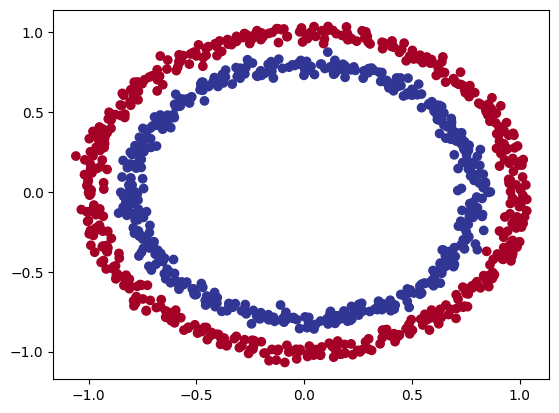

In [6]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu) # cmap stand for color map, RdYlBu stands for Red Yellow Blue

### **Check input and output shapes**

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Valies for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Valies for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### **Turn data into tensors and create train and test splits**

In [10]:
print(f"X is a: {type(X)} with datatype: {X.dtype}")
print(f"y is a: {type(y)} with datatype: {y.dtype}")

X is a: <class 'numpy.ndarray'> with datatype: float64
y is a: <class 'numpy.ndarray'> with datatype: int64


In [11]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32) # Without type(torch.float32) it will be a tensor with dype: float64
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
print(f"X is a: {type(X)} with datatype: {X.dtype}")
print(f"y is a: {type(y)} with datatype: {y.dtype}")

X is a: <class 'torch.Tensor'> with datatype: torch.float32
y is a: <class 'torch.Tensor'> with datatype: torch.float32


In [13]:
# Split data into training and test sets
# We can use train_test_split with PyTorch tensors as long as they are connected with a CPU
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42 # Similar to random seed, it's for reproducibiliy
                                                    )

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### **Building a model**

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accellator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [15]:
# 1. Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [16]:
# 2. Construct a model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # Generally out_features is a multiple of 8
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # First layer's out_features and Second layer's in_features must match 

    # Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2

# Instantiate an instance of out model class and send it to the target device
model_0 = CircleModelV0().to(device)

In [17]:
next(model_0.parameters()).device

device(type='cpu')

In [18]:
# Let's replicate the model above using nn.Sequential()
# Sequential() implements most of the code for us behind the scene
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3146, -0.2953],
                      [ 0.5887, -0.5538],
                      [ 0.6235, -0.2993],
                      [ 0.3949,  0.4614],
                      [ 0.3695,  0.0375]])),
             ('0.bias', tensor([-0.4954,  0.1735,  0.1981, -0.2336,  0.4810])),
             ('1.weight',
              tensor([[-0.1969,  0.3710,  0.3806, -0.0259, -0.3214]])),
             ('1.bias', tensor([-0.1803]))])

In [20]:
# Make predictions with the untrained model
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Spape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Spape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n {untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n {y_test}")

Length of predictions: 200, Spape: torch.Size([200, 1])
Length of test samples: 200, Spape: torch.Size([200, 2])

First 10 predictions:
 tensor([[-0.4321],
        [-0.3594],
        [-0.2750],
        [-0.4780],
        [ 0.2770],
        [ 0.3171],
        [ 0.0843],
        [ 0.2442],
        [-0.2985],
        [-0.3484]])

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0

Which loss function or optimizer should you use?

This is problem specific:
* For regression you might want MAE (Mean Absolute Error) or MSE (Mean Square Error)
* For classification you might want Binary Cross Entropy or Categorical Cross Entropy

And for optimizer, two of the most common and useful are:
* SGD 
* Adam 

However PyTorch has many built-in options.

In [21]:
# 3. Setup loss function: we are going to use 'torch.nn.BECWithLogitsLoss' (Binary Cross Entropy)
#loss_fn = nn.BCELoss() # BCELoss requires input to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss has the sigmoid activation function built-in and it is numerically stable

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [22]:
# Calculate accuracy
def accuracy_function(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

**Going from raw logits -> prediction probabilities -> prediction labels**

Our model outputs are going to be raw **logits**

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [29]:
# View the first 5 outputs of the forward psdd on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]

print(f"y_logits: {y_logits}\n")
print(f"y_test: {y_test[:5]}\n")
print(f"y_logits and y_test have not the same format!")

y_logits: tensor([[-0.4321],
        [-0.3594],
        [-0.2750],
        [-0.4780],
        [ 0.2770]])

y_test: tensor([1., 0., 1., 0., 1.])

y_logits and y_test have not the same format!


In [26]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3936],
        [0.4111],
        [0.4317],
        [0.3827],
        [0.5688]])

For our prediction probability values, we need to perform a range-style rounding on the:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [32]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for quality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze(), y_pred_labels.squeeze()

tensor([True, True, True, True, True])


(tensor([0., 0., 0., 0., 1.]),
 tensor([0., 0., 0., 0., 1.], grad_fn=<SqueezeBackward0>))

In [ ]:
# 4. Train model
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, # BCEWithLogitsLoss expects raw logits as input...
                   y_train   # ... and the training's label
                   )
    acc = accuracy_function(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the test loss/acc
        test_loss = loss_fn(test_logits, # Fist: predictions
                            y_test       # Second: true labels... the order matters!
                            )
        test_acc = accuracy_function(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        

Epoch: 0, | Loss: 0.70679, Acc: 50.12% | Test loss: 0.70308, Test acc: 46.50%
Epoch: 10, | Loss: 0.70327, Acc: 50.12% | Test loss: 0.70028, Test acc: 46.50%
Epoch: 20, | Loss: 0.70077, Acc: 50.00% | Test loss: 0.69835, Test acc: 46.00%
Epoch: 30, | Loss: 0.69895, Acc: 50.25% | Test loss: 0.69700, Test acc: 46.00%
Epoch: 40, | Loss: 0.69760, Acc: 50.50% | Test loss: 0.69603, Test acc: 46.00%
Epoch: 50, | Loss: 0.69658, Acc: 50.50% | Test loss: 0.69534, Test acc: 46.00%
Epoch: 60, | Loss: 0.69580, Acc: 50.62% | Test loss: 0.69484, Test acc: 46.00%
Epoch: 70, | Loss: 0.69520, Acc: 50.38% | Test loss: 0.69449, Test acc: 45.50%
Epoch: 80, | Loss: 0.69473, Acc: 50.12% | Test loss: 0.69424, Test acc: 46.00%
Epoch: 90, | Loss: 0.69436, Acc: 50.25% | Test loss: 0.69407, Test acc: 46.50%


From the matrics it looks like our model is not learning anything.

So to inspect it, let's make some prediction and make them visual.

To do so, we are going to import a function called `plot_decision_boundary()`

In [42]:
# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print(f"helper_functions.py is already exists, skipping download")
else:
    print(f"Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

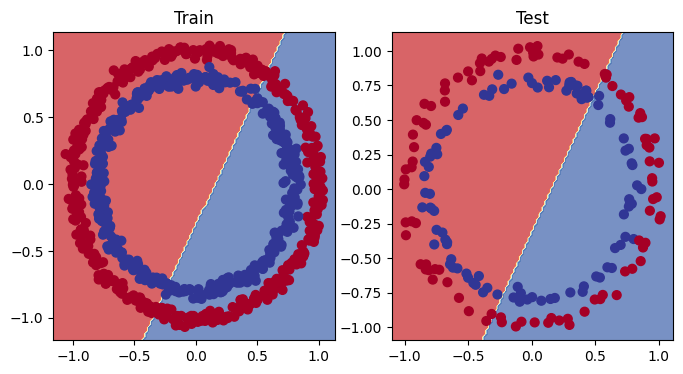

In [48]:
# Plot decision boundary of the model
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

This classification is very poor

### **Improving a model (from a model's perspective)**

* Add more layers - give the model more changes to learn about patterns in the data
* Add more hidden units - same thing as the previous one
* Fit for longer (increment the epochs)
* Changing the activation function
* Change the learning rate
* Change the loss function

This options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layer: 2 -> 3
* Increase the number of epochs: 100 -> 1000 

In [49]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        """z = self.layer_1(x)
        z = self.layer_2(z)
        z = self.layer_3(z)""" # Too long!
        return self.layer_3(self.layer_2(self.layer_1(x))) # This way of writing operations leverages speed ups where possible behind the scenes
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [50]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [51]:
# Write a training and evalutation loop for module_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

    # 2. Calculate the loss/acc
    loss = loss_fn(y_logits, y_pred)

    # 3. Optimizer
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate the loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_function(y_true=y_test, y_pred=test_pred)

# Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0, | Loss: 0.66418, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100, | Loss: 0.66418, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 200, | Loss: 0.66418, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 300, | Loss: 0.66418, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 400, | Loss: 0.66418, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 500, | Loss: 0.66418, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 600, | Loss: 0.66418, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 700, | Loss: 0.66418, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 800, | Loss: 0.66418, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 900, | Loss: 0.66418, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%


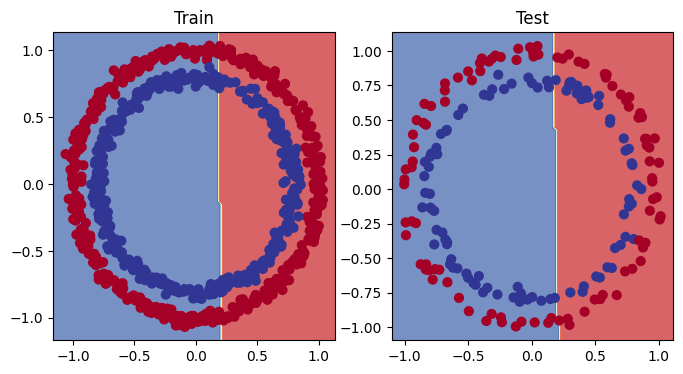

In [52]:
# Plot the decision boundary
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Even this model is not working...

### **Preparing data to see if our model can fit a straight line**

One way to troubleshoot a larger problem is to test out a smaller problem.

In [68]:
# Create some data (as same as 01_PyTorch_Workflow)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [69]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

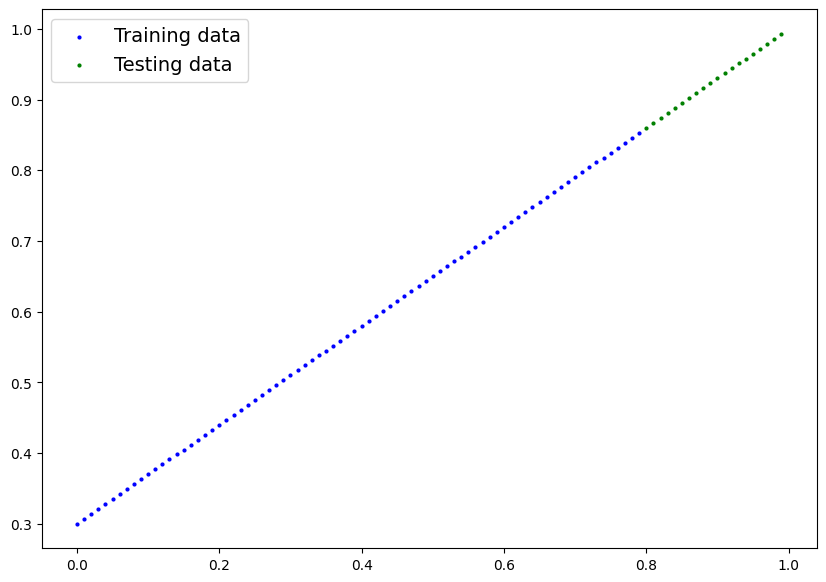

In [70]:
plot_predictions(train_data=X_train_regression, 
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [71]:
# Adjusting model_1 to fit a straight line
# So we create a model_2 with the same architecture as model_1 (with some changes)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [74]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [75]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    # Training
    model_2.train()
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

# Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")


Epoch: 0, | Loss: 0.06455 | Test loss: 0.12449
Epoch: 100, | Loss: 0.00696 | Test loss: 0.00109
Epoch: 200, | Loss: 0.00635 | Test loss: 0.00121
Epoch: 300, | Loss: 0.00604 | Test loss: 0.00098
Epoch: 400, | Loss: 0.00633 | Test loss: 0.00166
Epoch: 500, | Loss: 0.00631 | Test loss: 0.00137
Epoch: 600, | Loss: 0.00629 | Test loss: 0.00110
Epoch: 700, | Loss: 0.00659 | Test loss: 0.00160
Epoch: 800, | Loss: 0.00627 | Test loss: 0.00148
Epoch: 900, | Loss: 0.00625 | Test loss: 0.00118


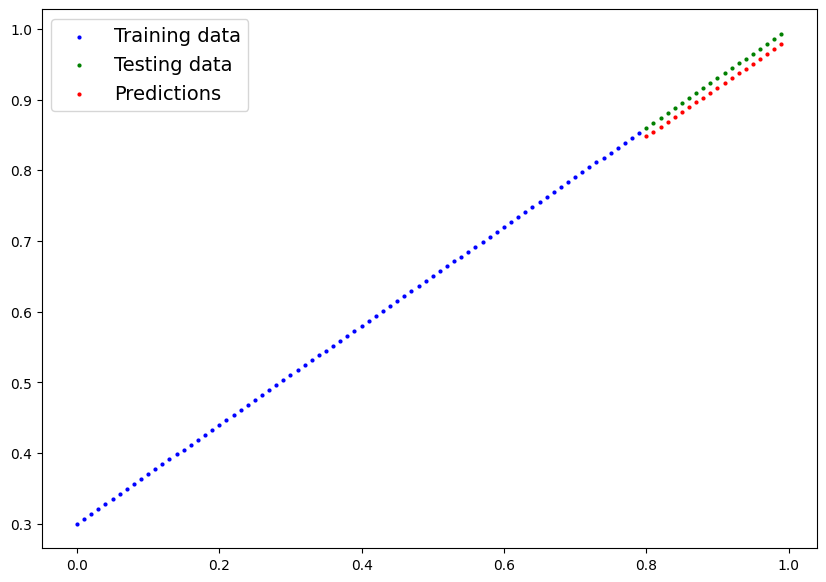

In [76]:
# Turn on evaluation mode
model_2.eval()

# Make prediction (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())